## How to create a graph for publication in an open and reproducible way

By [Serena Bonaretti](https://sbonaretti.github.io/)  
Content under Creative Commons Attribution license CC-BY-NC-SA 4.0     
Code under GNU-GPL v3 License 

---

- The task is to produce Fig. 8 from the paper:  
  *Orellana et al. 2024. **Revealing the complexity of meniscus 
microvasculature through 3D visualization and analysis***
https://doi.org/10.1038/s41598-024-61497-2

- This notebook is also an example of how to create a **reproducible workflow** using Jupyter Notebook, Python, Zenodo, and GitHub.

- These are the 3 steps that make this workflow reproducible:   
  1. [Automatically downloading data from a repository](#download)  
  2. [Automating data manipulation and plot creation](#manipulation)
  3. [Printing dependences](#dependencies) 

--- 
Installing the Python packages that we will need:

In [1]:
!pip3 install wget

Defaulting to user installation because normal site-packages is not writeable
  Using cached wget-3.2-py3-none-any.whl
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
!pip3 install watermark

Defaulting to user installation because normal site-packages is not writeable
  Using cached watermark-2.4.3-py2.py3-none-any.whl (7.6 kB)
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


--- 
- Importing the Python libraries that we will need below:

In [3]:
import wget                     # to download from zenodo
import pandas as pd             # to manipulate the table
import numpy as np              # for some math
import matplotlib.pyplot as plt # to plot 

---
<a name = "download"></a>
## 1. Automatically downloading data from a repository

- Input data should be in a repository that provides a **persistent digital object identifier (DOI)** so that data will be available in the future
- It is *discouraged* to share data from **personal repositories** because links tend to get deleted, thus compromising the reproducibility of the workflow

- The data that we will use in this notebook is in the file `2024_Orellana_data_fig_8.csv` at this Zenodo link: www.doi.org/10.5281/zenodo.11491110

In [4]:
# ---> complete the zenodo url with the last digits of the specific version of the dataset DOI
zenodo_url = "https://zenodo.org/record/11491110/files/"
print (zenodo_url)

https://zenodo.org/record/11491110/files/


In [5]:
# ---> enter the file name
file_name  = "2024_Orellana_data_fig_8.csv" 
print (file_name)

2024_Orellana_data_fig_8.csv


In [6]:
# download using wget.download(repository, local)
wget.download(zenodo_url + file_name, file_name) # "./" means "in this folder"

100% [..............................................................] 337 / 337

'2024_Orellana_data_fig_8 (1).csv'

In [7]:
# read the table
df = pd.read_csv(file_name)
# show the table
df

,ant_lat,ant_med,mid_ant_lat,mid_ant_med,mid_pos_lat,mid_pos_med,pos_lat,pos_med
0,86.31,64.95,123.87,70.54,44.36,39.56,246.71,40.59
1,52.15,45.97,76.43,47.77,29.18,26.28,142.36,36.79
2,18.00,27.00,29.00,25.00,14.00,13.00,38.00,33.00
3,18.00,27.00,29.00,25.00,14.00,13.00,38.00,33.00
4,-16.15,8.03,-18.43,2.23,-1.18,-0.28,-66.36,29.21
5,-50.31,-10.95,-65.87,-20.54,-16.36,-13.56,-170.71,25.41


---
<a name = "manipulation"></a>
## 2. Automating data manipulation and plot creation

- **Automatic** data manipulation does not compromise original data and keeps track of manipulations, making analyses reproducible
- It is *discouraged* to do **manual** manipulation, as it compromises original data, is prone to errors, and does not keep track of changes, making analyses hardly reproducible



In [8]:
# calculate mean and standard error for each column
means = df.mean()
print ("means:", means)

means: ant_lat        18.0
ant_med        27.0
mid_ant_lat    29.0
mid_ant_med    25.0
mid_pos_lat    14.0
mid_pos_med    13.0
pos_lat        38.0
pos_med        33.0
dtype: float64


In [9]:
# calculate the standard error for each column
standard_errors = df.sem()
print ("standard_errors:", standard_errors)

standard_errors: ant_lat        19.718821
ant_med        10.954644
mid_ant_lat    27.386033
mid_ant_med    13.146266
mid_pos_lat     8.764177
mid_pos_med     7.667212
pos_lat        60.249965
pos_med         2.190467
dtype: float64


In [10]:
# transform the mean from a pandas series into a list
means = means.to_list()
print ("means:", means)

means: [18.0, 27.000000000000004, 29.0, 25.0, 13.999999999999998, 13.0, 38.00000000000001, 33.0]


In [11]:
# ---> transform the standard error from a pandas series into a list
standard_errors = standard_errors.to_list()
print ("standard_errors:", standard_errors)

standard_errors: [19.718821127711127, 10.954644068460953, 27.386032693084022, 13.146265629447779, 8.76417708629852, 7.66721157483823, 60.2499647026176, 2.1904672256545332]


In [12]:
# separate mean for lateral and medial sides
m_lateral = means[::2]
m_medial  = means[1::2]

print ("m_lateral", m_lateral)
print ("m_medial", m_medial)

m_lateral [18.0, 29.0, 13.999999999999998, 38.00000000000001]
m_medial [27.000000000000004, 25.0, 13.0, 33.0]


In [13]:
# ---> separate standard error for lateral and medial sides
se_lateral = standard_errors[::2]
se_medial  = standard_errors[1::2]

print ("se_lateral", se_lateral)
print ("se_medial", se_medial)

se_lateral [19.718821127711127, 27.386032693084022, 8.76417708629852, 60.2499647026176]
se_medial [10.954644068460953, 13.146265629447779, 7.66721157483823, 2.1904672256545332]


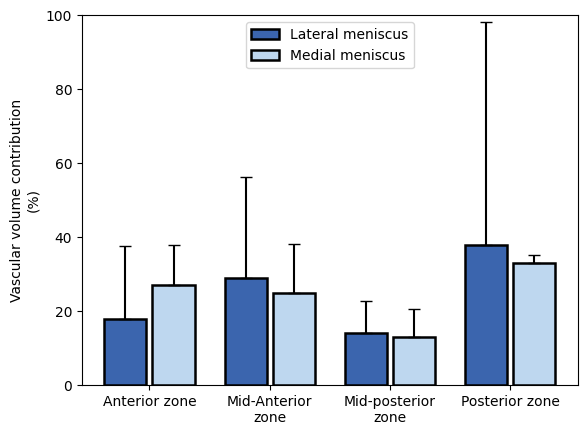

In [14]:
# create the plot

# position of the bars on x
x_axis = np.arange(len(m_lateral)) 

# plotting the bars for the lateral meniscus
plt.bar(x_axis - 0.2,                # position on x
        m_lateral,                   # y
        0.35,                        # bin width
        label = 'Lateral meniscus',  # label for legend
        yerr=[[0,0,0,0],se_lateral], # error bar
        capsize=4,                   # length of error bar tick
        color='#3B65AE',             # bar color
        edgecolor='black',           # color of bar edge 
        linewidth=1.8                # width of bar edge
       ) 

# plotting the bars for the medial meniscus
plt.bar(x_axis + 0.2, 
        m_medial, 
        0.35, 
        label = 'Medial meniscus',
        yerr=[[0,0,0,0], se_medial],
        capsize=4,
        color='#BED7EF',
        edgecolor='black',
        linewidth=1.8
       ) 

# adding other characteristics to the graph
plt.xticks(x_axis, ["Anterior zone", "Mid-Anterior\nzone", "Mid-posterior\nzone", "Posterior zone"]) 
plt.ylabel("Vascular volume contribution\n(%)")
plt.ylim([0,100])
plt.legend(loc="upper center")
plt.show()

<a name="dependencies"></a>
## 3. Printing dependences

- Dependences are fundamental to record the **computational environment**.   
- We use [watermark](https://github.com/rasbt/watermark) to print: version of python, ipython, and packages, and characteristics of the computer
  - *Note:* Watermark is not a Python package but a *Jupyter notebook extension*–this is why commands start with`%`

In [15]:
%load_ext watermark

# printing date, python version, ipython version, and machine characteristics
%watermark 

# print Python packages' version
%watermark --iversion 

Last updated: 2024-06-06T11:43:57.969599+02:00

Python implementation: CPython
Python version       : 3.9.6
IPython version      : 8.18.1

Compiler    : Clang 15.0.0 (clang-1500.3.9.4)
OS          : Darwin
Release     : 23.2.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit

numpy     : 1.26.4
matplotlib: 3.8.4
wget      : 3.2
pandas    : 2.2.2



---
## Last steps

- When publishing a paper, this kind of notebook should be uploaded to a GitHub repository
- The **link to notebook on GitHub** can be **added to the Figure caption** so that a reader can reproduce the graph
- *Note*: It is highly possible that in a not too far away future, we will write **digital reproducible and interactive papers** (using [MyST](https://mystmd.org/)!), which are papers with interactive graphs included in the publications. This starts to happen for conferences (like [SciPy 2024](https://www.scipy2024.scipy.org/)) and will happen soon for journals in the Earth Sciences
- To be continued...